# Creating Statistical Values for 5 Sets of Computer Data

## Computer Values:

Percent of RAM being used

Disc reads

Disc writes

Network Uploads

Network Downloads

## Statistical Values:

Mean

Median

Variance

Standard Deviation

Linear Regression

Quadratic Regression

Integral

imports

In [2]:
import psutil
import time
import matplotlib.pyplot as plt

## Configurables

df will be the csv file. If you need a custom csv file, make df equal to that file. The custom csv must have only 5 columns. Set col 1-5 equal to the column names.
Otherwise, set df to be a string called default. If it is default, it will be a csv file of the computer values.

In [3]:
df = "default"

col1 = "RAM"
col2 = "DISC READS"
col3 = "DISC WRITES"
col4 = "NETWORK UPLOADS"
col5 = "NETWORK DOWNLOADS"

collecting_seconds is how long you want the data to be collected for. If you already have a custom csv file, set collecting_seconds to 0.

In [4]:
collecting_seconds = 60

## Class to calculate the data

In [5]:
class data_output:
    def __init__(self, values):
        vals = values
        self.getvals = values
        def mean_calc(vals):
            return sum(vals)/len(vals)
        self.mean = mean_calc(vals)
        def median_calc(vals):
            sorted_list = []
            for val in vals:
                sorted_list.append(val)
            sorted_list.sort()
            if (len(sorted_list)%2 == 0): #if there are an even number of values
                median = (sorted_list[int(len(sorted_list)/2 - 1)] + sorted_list[int(len(sorted_list)/2)])/2
            else: #if there are an odd number of values
                median = sorted_list[int(len(sorted_list)/2)]
            return median
        self.median = median_calc(vals)
        def variance_calc(vals):    
            summed_vals = 0
            for val in vals:
                summed_vals += (val - self.mean) * (val - self.mean) #creating the sum
            return summed_vals/len(vals) #dividing the sum by the number of values
        def stdev_calc(vals):
            return variance_calc(vals)**(1/2) #square rooting the variance

        self.variance = variance_calc(vals)
        self.standard_deviation = stdev_calc(vals)
        
        def x_calc(vals):
            x_vals = []
            for val in vals: #will loop for the amount of values there are in vals
                x_vals.append(len(x_vals) + 1) #x_vals will start at one and count 
                                               #up by one until the loop ends
            return x_vals

        def linreg_calc(vals):
            x_vals = x_calc(vals)
            
            sumy = sum(vals)
            sumx2 = 0
            for i in x_vals:
                sumx2 += i * i
            sumx = sum(x_vals)
            sumxy = 0
            index = 0
            while index < len(vals):
                sumxy += vals[index] * x_vals[index]
                index += 1
            n = len(vals)
            
            a = (sumy * sumx2 - sumx * sumxy)/(n * sumx2 - sumx * sumx)
            
            b = (n * sumxy - sumx * sumy)/(n * sumx2 - sumx * sumx)
            
            return str("{:.2f}".format(b)) + "x" + " + " + str("{:.2f}".format(a))
        self.linreg = linreg_calc(vals)
        
        
        def quadreg_calc(vals):
            #god save my soul
            x_vals = x_calc(vals)
            sumx = sum(x_vals)
            sumy = sum(vals)
            n = len(vals)
            
            sumx2 = 0
            for i in x_vals:
                sumx2 += i * i
            ssumx2 = sumx2
            sumx2 -= sumx * sumx / n
            
            
            sumxy = 0
            index = 0
            while index < len(vals):
                sumxy += vals[index] * x_vals[index]
                index += 1
            nspacexy = sumxy
            sumxy -= sumx * sumy / n
            
            
            sumx3 = 0
            for i in x_vals:
                sumx3 += i * i * i
            ssumx3 = sumx3
            sumx3 -= ssumx2 * sumx / n
            
            sumx2y = 0
            index = 0
            while index < len(vals):
                sumx2y += vals[index] * x_vals[index] * x_vals[index]
                index += 1
            nspacex2y = sumx2y
            sumx2y -= ssumx2 * sumy / n
            
            sumx4 = 0
            for i in x_vals:
                sumx4 += i * i * i * i
            ssumx4 = sumx4
            sumx4 -= ssumx2 * ssumx2 / n
            
            
            c = (sumx2y * sumx2 - nspacexy * sumx3) / (sumx2 * sumx4 - sumx3 * sumx3)
            b = (nspacexy * sumx4 - nspacex2y * sumx3) / (sumx2 * sumx4 - sumx3 * sumx3)
            a = sumy / n - sumx / n * b - ssumx2 / n * c
            res = str("{:.2f}".format(c)) + "x^2 + " + str("{:.2f}".format(b)) + "x + " + str("{:.2f}".format(a))
            return res
        self.quadreg = quadreg_calc(vals)
            

        def integral_calc(vals):
            x_vals = x_calc(vals)
            l = 0
            left_vals = []
            r = 0
            right_vals = []
            a = 0
            avg_vals = []
            while l < len(vals) - 1: #left Riemann sum
                left_vals.append((x_vals[l + 1] - x_vals[l]) * vals[l])
                l += 1

            while r < len(vals) - 1: #right Riemann sum
                right_vals.append((x_vals[r + 1] - x_vals[r]) * vals[r + 1])
                r += 1
            #subtracted 1 in both of the while loop statements because 
            #otherwise there would be an "index out of bounds" error

            while a < len(left_vals): #average
                avg_vals.append((right_vals[a] + left_vals[a])/2)
                a += 1
            return sum(avg_vals) #sum
        self.integral = integral_calc(vals)
        print("mean: " + str("{:.2f}".format(self.mean)))
        print("median: " + str("{:.2f}".format(self.median)))
        print("variance: " + str("{:.2f}".format(self.variance)))
        print("standard deviation: " + str("{:.2f}".format(self.standard_deviation)))
        print("linear regression: " + self.linreg)
        print("quadratic regression: " + self.quadreg)
        print("integral: " + str("{:.2f}".format(self.integral)))

    def get_graph_linear(self):
        firstnum = float(self.linreg[0:self.linreg.find('x')])
        lastnum = float(self.linreg[self.linreg.find("+") + 2:])
        return [firstnum, lastnum]

    def get_graph_quadratic(self):
        firstnum = float(self.quadreg[0:self.quadreg.find('x')])
        secondnum = float(self.quadreg[self.quadreg.find("+") + 2: self.quadreg.find('x ')])
        lastnum = float(self.quadreg[self.quadreg.find('x ') + 4:])
        return [firstnum, secondnum, lastnum]
    

## Class to input the data and format the output

In [6]:
class show_data:
    global df
    ram = []
    discr = []
    discw = []
    netu = []
    netd = []

    classram = ""
    classdiscr = ""
    classdiscw = ""
    classnetu = ""
    classnetd = ""

    def collect_data(t_need):
        global df
        global ram
        global discr
        global discw
        global netu
        global netd
        start_time = time.time()
        ram = []
        discr = []
        discw = []
        netu = []
        netd = []
        while time.time() - start_time < t_need:
            print(str(int((time.time() - start_time)/t_need * 100)) + " percent complete      ", end = '')
            ram.append(psutil.virtual_memory().percent)
            discr.append(tuple(psutil.disk_io_counters())[0])
            discw.append(tuple(psutil.disk_io_counters())[1])
            netu.append(tuple(psutil.net_io_counters())[0])
            netd.append(tuple(psutil.net_io_counters())[1])
            
            time.sleep(3)
        if df == "default":    
            df = pd.DataFrame(list(zip(ram, discr, discw, netu, netd)), 
                              columns =['RAM', 'DISC READS', 'DISC WRITES', 'NETWORK UPLOADS', 'NETWORK DOWNLOADS'])
            df.to_csv('psutil', index=False)
        
        
        print("")
        print("")
        
    def show_ram():
        global classram
        global df
        global col1
        classram = data_output(df[col1].tolist())
        show_data.plot(classram)

    def show_disc_reads():
        global classdiscr
        global df
        global col2
        classdiscr = data_output(df[col2].tolist())
        show_data.plot(classdiscr)

    def show_disc_writes():
        global classdiscw
        global df
        global col3
        classdiscw = data_output(df[col3].tolist())
        show_data.plot(classdiscw)
    
    def show_net_uploads():
        global classnetu
        global df
        global col4
        classnetu = data_output(df[col4].tolist())
        show_data.plot(classnetu)
        
    def show_net_downloads():
        global classnetd 
        global df
        global col5
        classnetd = data_output(df[col5].tolist())
        show_data.plot(classnetd)
    
    def plot(data_outputer):
        coeffs = data_outputer.get_graph_linear()
        x = []
        for i in data_outputer.getvals:
            x.append(len(x))
        
        coefs = data_outputer.get_graph_quadratic()
        z = []
        for i in x:
            z.append(coefs[0] * i * i + coefs[1] * i + coefs[2])

        y = []
        for i in x:
            y.append(coeffs[0] * i + coeffs[1])

        
        
       
        plt.scatter(x, data_outputer.getvals, color = 'r')
        plt.plot(x, y, color = 'b')
        
        plt.show()



## Code to output the data

In [7]:
show_data.collect_data(collecting_seconds)
df

0 percent complete      5 percent complete      10 percent complete      15 percent complete      20 percent complete      25 percent complete      30 percent complete      35 percent complete      40 percent complete      45 percent complete      50 percent complete      55 percent complete      60 percent complete      65 percent complete      70 percent complete      75 percent complete      80 percent complete      85 percent complete      90 percent complete      95 percent complete      



,RAM,DISC READS,DISC WRITES,NETWORK UPLOADS,NETWORK DOWNLOADS
0,4.7,372393,647886,93421,94087
1,4.7,372395,648110,94665,95331
2,4.7,372395,648127,95857,96523
3,4.7,372397,648143,97050,97716
4,4.7,372397,648143,98243,98909
5,4.7,372397,648408,99436,100102
6,4.7,372398,648428,100629,101295
7,4.7,372398,648460,101822,102488
8,4.7,372400,648476,103015,103681
9,4.7,372401,648491,104208,104874


col1 statistical data

mean: 4.70
median: 4.70
variance: 0.00
standard deviation: 0.00
linear regression: -0.00x + 4.70
quadratic regression: -1.18x^2 + 10.14x + 67.63
integral: 89.30


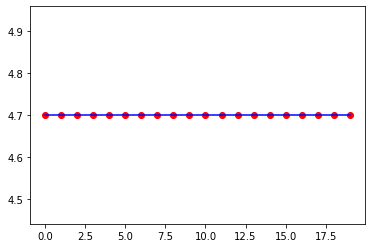

In [8]:
show_data.show_ram()

col2 statistical data

mean: 372432.25
median: 372432.50
variance: 1239.89
standard deviation: 35.21
linear regression: 5.46x + 372374.93
quadratic regression: -93553.56x^2 + 803675.17x + 5358779.02
integral: 7076213.50


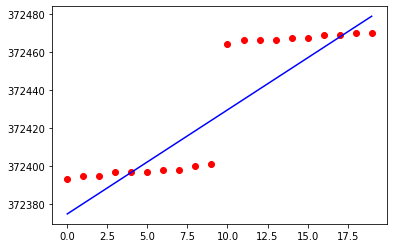

In [9]:
show_data.show_disc_reads()

col3 statistical data

mean: 648437.95
median: 648495.00
variance: 52067.35
standard deviation: 228.18
linear regression: 37.09x + 648048.51
quadratic regression: -162887.08x^2 + 1399338.77x + 9329676.26
integral: 12320459.50


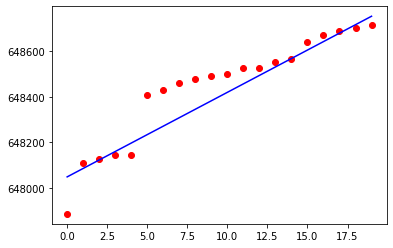

In [10]:
show_data.show_disc_writes()

col4 statistical data

mean: 104802.05
median: 104804.50
variance: 47378801.75
standard deviation: 6883.23
linear regression: 1193.70x + 92268.18
quadratic regression: -26326.03x^2 + 227348.86x + 1495424.93
integral: 1991261.50


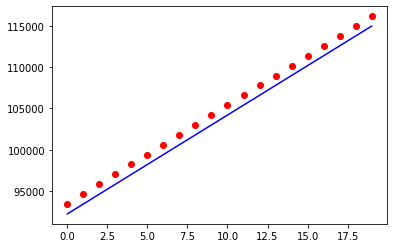

In [11]:
show_data.show_net_uploads()

col5 statistical data

mean: 105468.05
median: 105470.50
variance: 47378801.75
standard deviation: 6883.23
linear regression: 1193.70x + 92934.18
quadratic regression: -26493.33x^2 + 228786.01x + 1505007.84
integral: 2003915.50


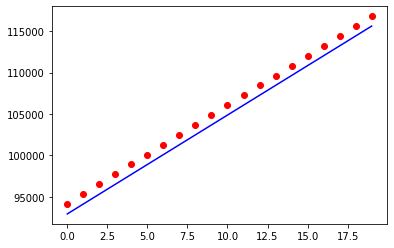

In [12]:
show_data.show_net_downloads()